In [20]:
# ipython notebook style figures
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# imports
import sys
# module for manipulating data symphony specific data
from ts import data
# module for time series analysis
from ts import model
import pandas
import numpy as np

In [21]:
indicators = []
for ind in data.listIndicators():
    indicators.append(ind["name"])

In [24]:
df = pandas.DataFrame()
df = df.append([["IND"," PREV NRMSD", "PREV RMSE", "AR NRMSD", "AR RMSE", "ARMA NRMSD", "ARMA RMSE", "MIN RMSE", "MIN NRMSD"]])
vals = []
for ind in data.listIndicators():
    ind_name = ind["name"]
    ind_desc = ind["desc"]
    try:
        indicator = data.getIndicator(ind_name)
        ar = model.AR_val(indicator,24)
        arma = model.ARMA_val(indicator,24)
        prev = model.validation_prev(indicator,24)
        
        # find min RMSE
        min_rmse = prev[1]["RMSE"]
        min_rmse_lbl = "PREV"
        if ar[2]["RMSE"] < min_rmse:
            min_rmse = ar[2]["RMSE"]
            min_rmse_lbl = "AR"
        if arma[2]["RMSE"] < min_rmse:
            min_rmse = arma[2]["RMSE"]
            min_rmse_lbl = "ARMA"
            
        # find min NRMSD
        min_nrmsd = prev[1]["NRMSD"]
        min_nrmsd_lbl = "PREV"
        if ar[2]["NRMSD"] < min_nrmsd:
            min_nrmsd = ar[2]["NRMSD"]
            min_nrmsd_lbl = "AR"
        if arma[2]["NRMSD"] < min_nrmsd:
            min_nrmsd = arma[2]["NRMSD"]
            min_nrmsd_lbl = "ARMA"
        
        vals.append((indicator, prev[0], ar[0], arma[0], prev[0], ar[1], ind_name, ind_desc))
        df = df.append([[ind_name,prev[1]["NRMSD"], prev[1]["RMSE"], ar[2]["NRMSD"], ar[2]["RMSE"], arma[2]["NRMSD"], arma[2]["RMSE"], min_rmse_lbl, min_nrmsd_lbl]])
    except:
        pass
df

,0,1,2,3,4,5,6,7,8
0,IND,PREV NRMSD,PREV RMSE,AR NRMSD,AR RMSE,ARMA NRMSD,ARMA RMSE,MIN RMSE,MIN NRMSD
0,PRAGUESE/PX,0.3609759,31.38686,0.308907,32.76856,0.2991691,32.78196,PREV,ARMA
0,BLSN/EIUCOASEANZ334,0.1002603,1.012629,0.07318337,0.7686457,0.1012876,1.014556,AR,AR
0,BLSE/CES9000000001,0.07500434,13.95081,0.06969367,13.69349,0.06618976,13.02785,ARMA,ARMA
0,ECB/STS_M_I6_N_UNEH_LTT000_4_000,0.1388729,487.0274,0.06910842,240.1709,0.1277352,486.2774,AR,AR
0,ECB/RTD_M_S0_N_E_ERC0_NGR_X,0.09432093,1.371653,0.08525248,1.280536,0.08848374,1.31467,AR,AR
0,FRED/M1490BUSM157SNBR,0.3905733,7.124058,0.5785334,5.700622,0.8425458,6.015642,AR,PREV
0,ECB/RTD_M_S0_N_P_P_MANUF_DS_X,0.1302851,0.4929037,0.09270871,0.42078,0.0918949,0.4100334,ARMA,ARMA
0,ECB/RTD_M_S0_N_P_P_XCONS_DS_X,0.0944237,0.4390919,0.08389209,0.4260016,0.08444743,0.4199872,ARMA,AR
0,ECB/RTD_M_S0_N_P_P_ENERG_DS_X,0.09150793,1.438779,0.082624,1.367794,0.08493149,1.388552,AR,AR


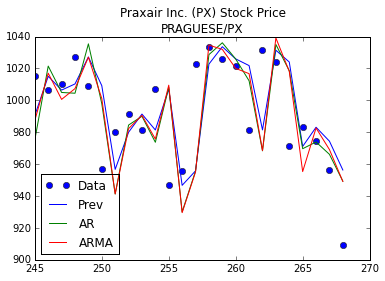

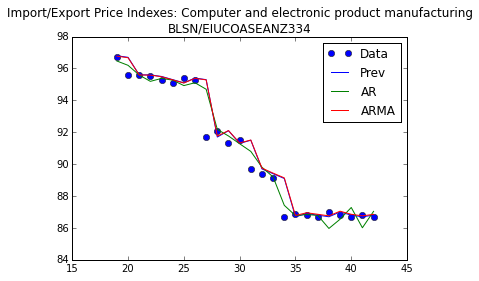

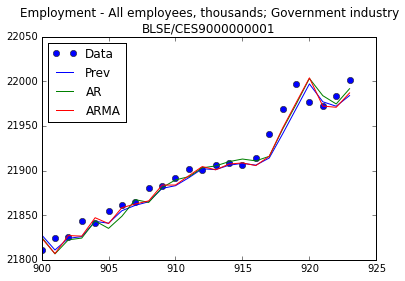

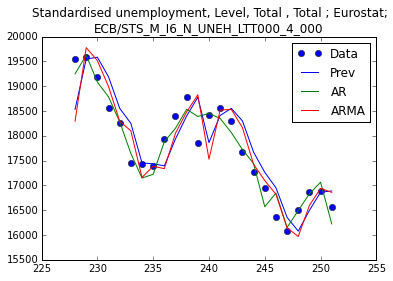

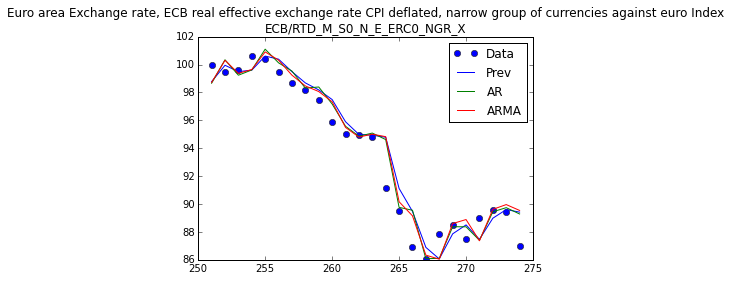

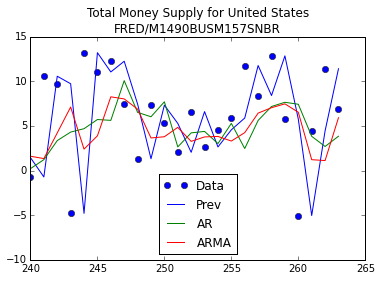

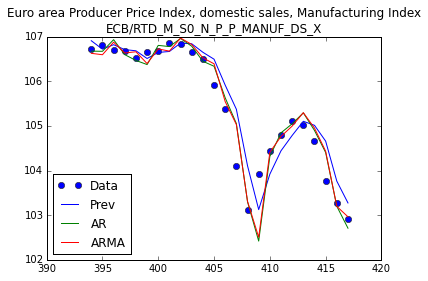

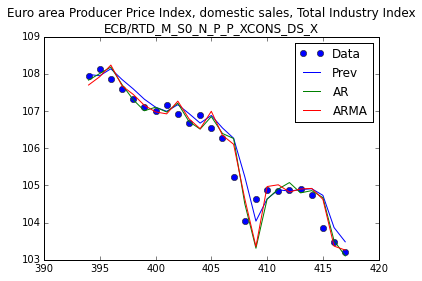

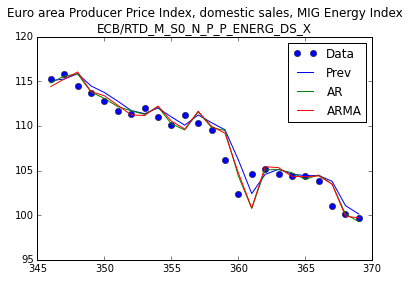

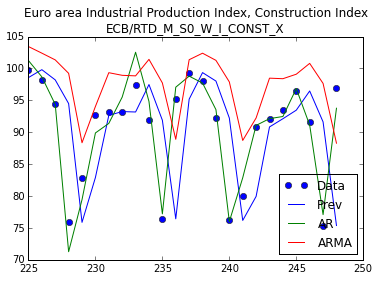

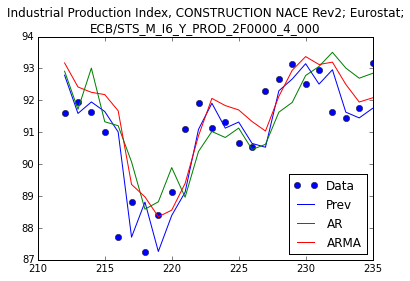

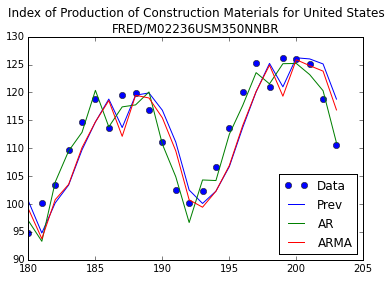

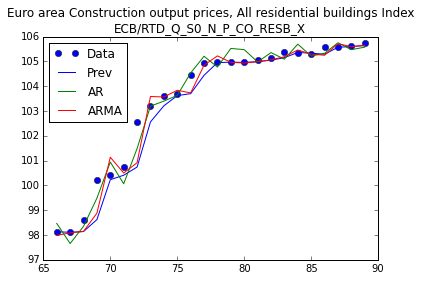

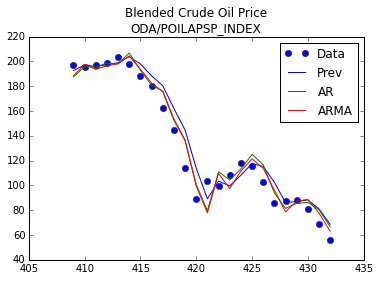

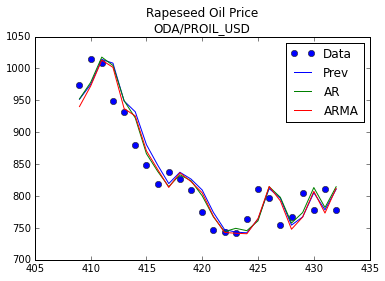

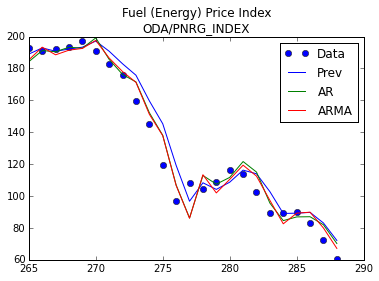

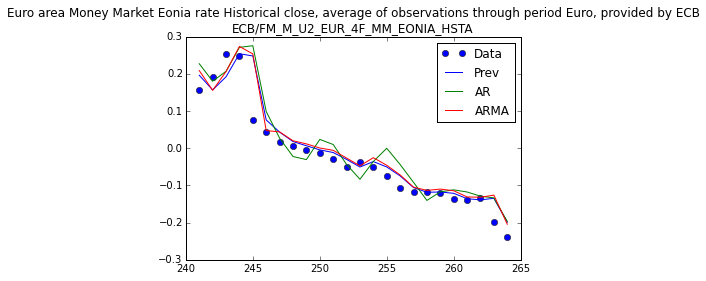

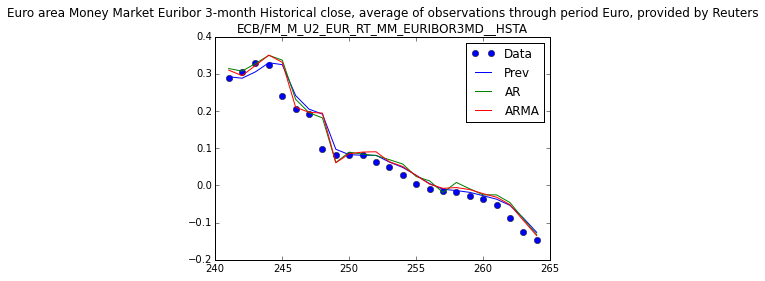

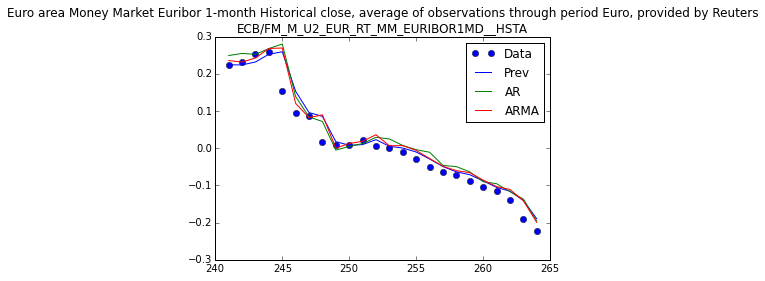

In [23]:
for val in vals:
    try:
        model.plot_pred_4(val[7]+"\n"+val[6],val[0],val[1],val[2],val[3],val[5])
    except:
        pass